# <span style="color:#002F82"><center>Genetics and Evolution</center></span><span style="color:#00BDA8"><center>Assignment One</center></span>
## <span style="color:#00BD69 "><center>Hadis Ahmadian</center></span><span style="color:#9EBD00"><center>400211524</center></span> 




### Libraries : 

first we need to import the libraries that we need:

**random** library for generating random numbers.

**matplotlib** for drawing graphs.

In [1]:
import random
import matplotlib.pyplot as plt

### fitness function : 

here we define a function called **fitness**. fitness function is suppose to give us the idea that how good a genome is. the approach that I used for fitness function is distance of the string genome and the goal genome. 

this function counts the *number of characters that are in the same place and have the same value in two strings*.

In [2]:
def fitness(string,target):
    c=0
    for i in range(len(string)):
        if string[i]==target[i]:
            c+=1
    return c

### mutation function : 

now we define a function called **mutation**. this function recives the genome, the alphabet of the string and a rate. then it makes a random number between 0 and 1. if then number is grater than rate, then mutation does not happen, otherwise, the function chooses a random place of the genome and then replaces the character in that place with a random character of the alphabet.

In [3]:
def miutation(string_in,alphabet,rate):
    string=[]
    for i in range(len(string_in)):
        string.append(string_in[i])
    i=random.randrange(0,len(string),1)
    j=random.randrange(0,len(alphabet),1)
    if random.random()<rate:
        string[i]=alphabet[j]
    return string

 
### <span style="color:blue">Darwin's approach:</span>

**1. defenition of variables and parameters**

*parent*: a variable that holds the parent genome of every generation (initializes with a random string).

*goal*: the genome that we want to have at the end. it represents the best genome possible for the enviroment.

*alphabet*: english alphabet + " "(space), used for mutation.

*curr_fit*: saves the best so far fitness we found.

*children*: number of children of each generation

*count*: holds the number of generation we are in

*data and data_x*: save the number and the fitness of each generation (for drawing the graph)


**2. evolving the parent**

while loop keeps making new generations until we reach the goal. the way that we make the new generation is that we mutate our parent(mutation may or may not happen depending on the rate) and make a number of children that are the next generation. depending on either the mutation happend or not and if the mutation made the string better or worst, the fitness of children could be equal,less, or more than the parent. At the end of each generation we choose the child with highest fitness as the parent for the next generation, and as said before, we keep doing this until the parent of a generation becomes the goal string.

the logic behind this code is that, in every generatin, we make a number of children by ,mutating the parent. the child that has the best genome and is better for the enviroment, gets to live and go to next generation and this will continue and children will become better and better for the enviroment, until one child becomes perfect.

**3. finding the optimal size of the generation and mutation rate**

size of the generation : as more children as we make every generation, we will have more chance to find a child that is btter than the parent; however if we keep increasing number of children, at some point the resources(mostly time) that we need to compute them and find their best is not worthy, so by experiment, 200 seems like a good size for a generation.

mutation rate: if we choose a low rate (like 0.1, meaning that 10 percent of children mutate), most of the children will be the same as their parent, so it seems like we need a high rate to achive a better result. but we should keep in mind that not all miutations are good and some of them will make children worst than their parent so we can not mutate all the children (in case all mutations become bad mutations) and rate=1 is not a good choice. concluding reasons above and by experiment, rate=0.9 seems like a very good rate of ,mutation.

**4. results**

we can se the number of generations and the genome of the parent of each generation in the output.



--------------------------------------------------------Generation1----------------------------------------------------
fitness : 4
['o', 'q', 'u', 'j', 'n', 'j', 'x', ' ', 'r', 'e', 'n', ' ', 'c', 'd', 'm', 'w', 'a', 't', 'x', 'w', 'i', 'o', 'o', 'm', 'l', 'u', 'd', 'n', 'u', 's', 'f', 'v', 't', 'o', 'i', 'a', 'o', 'o', 'l', 'g', 'x', 't', 'i', 'h', 'p']
--------------------------------------------------------Generation2----------------------------------------------------
fitness : 5
['o', 'q', 'u', 'j', 'n', 'j', 'x', ' ', 'r', 'e', 'n', ' ', 'c', 'd', 'm', 'w', 'a', 't', 'x', 'w', 'i', 'o', 'o', 'm', 'l', 'u', 'd', 'n', 'u', 's', 'f', 'v', 'a', 'o', 'i', 'a', 'o', 'o', 'l', 'g', 'x', 't', 'i', 'h', 'p']
--------------------------------------------------------Generation3----------------------------------------------------
fitness : 6
['o', 'q', 'u', 'j', 'n', 'j', 'x', ' ', 'r', 'e', 'n', ' ', 'c', 'd', 'm', 'w', 'a', 't', 'x', 'w', 'i', 'o', 'o', 'm', 'l', 'u', 'd', 'n', 'u', 's', '

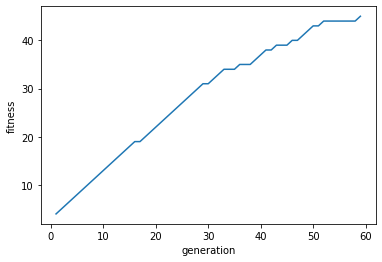

In [4]:
parent=[]
goal=["k","e"," ","e","s","h","q"," ","a","s","a","n"," ","n","e","m","u","d"," ","a","v","a","l"," ","v","a","l","i"," ","o","f","t","a","d"," ","m","o","s","h","k","e","l"," ","h","a"]
alphabet=["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"," "]

for i in range(len(goal)):
    parent.append(alphabet[random.randrange(0,len(alphabet),1)])
    
curr_fit=fitness(parent,goal)
children=200
rate=0.9
count=0
data=[]
data_x=[]
best_child=[]
while parent!=goal:
    best_child=parent
    for i in range(children):
        new_child=miutation(parent,alphabet,rate)
        if curr_fit<fitness(new_child,goal):
            curr_fit=fitness(new_child,goal)
            best_child=new_child
    parent=best_child
    count+=1
    print("--------------------------------------------------------Generation"+str(count)+"----------------------------------------------------")
    data_x.append(count)
    data.append(curr_fit)
    print("fitness : "+str(curr_fit))
    print(parent)
    
    

 
plt.plot(data_x, data)

plt.xlabel('generation')
plt.ylabel('fitness')

plt.show()

### phenotype function : 

here we define a function called **phenotype**. In order to do the same thing with Lamarck's approach, we need to try to define phenotype in programming. this function recives a genome and the perfect genome for the enviroment and depending on the rate, it replaces a random character of the string, with the character that is in the same place in the perfect genome.

I will explain later how this function represents the phenotype effects on genotype.

In [5]:
def phenotype(string,goal,rate):
    i=random.randrange(0,len(string),1)
    if random.random()<rate:
        string[i]=goal[i]

 
### <span style="color:blue">Lamarck's approach:</span>

**1. defenition of variables and parameters**

same as before,


**2. evolving the parent**

everything is same as Darwin's approach exept that the phenotype will have effect on genotype.in Darwin's approach after a child was made by a mutaion, its genome won't change anymore but in Lamarck's approach, we assume that the phenotype becomes suitable for the enviroment and will make this change to the genome too. for this to happen, after we make a child with mutating the parent, we make another change in its genome: since we assumed that phenotype became more suitable for the enviroment, it will affect genotype and makes genotype more close to the perfect genom by "*replacing a random character of genome with the good change that happend in phenotyope*". this happens using phenotype function that we explained before.

the rate by wich this happens is considered 0.9 it means that we assumed 90 percent of the children will chnage in the enviroment and as their phenotype becomes better for the enviroment, their genome will also follow this change.

note that the key diffrence between this change and the mutation is that, mutation is random, but the effect of an improved phenotype, is allways a good change and makes the genome closer to the goal.

**3. finding the optimal size of the generation and mutation rate**

same as before.

**4. results**

we can se the number of generations and the genome of the parent of each generation in the output.



--------------------------------------------------------Generation1----------------------------------------------------
fitness : 3
['q', 'x', 'a', 'v', 'x', 's', 'z', 'd', 'z', 'q', 'f', 'k', 'j', 'q', 'k', 'm', 'g', 'q', 'w', 'c', 'y', 'y', 'h', 'c', 'c', 'p', 'o', 'h', 'n', 'a', 'f', 'z', 'q', 'y', 'u', ' ', 'i', 'h', 'c', 'k', 'b', 'x', 'y', ' ', 'h']
--------------------------------------------------------Generation2----------------------------------------------------
fitness : 5
['q', 'x', 'a', 'v', 'x', 's', 'q', 'd', 'z', 'q', 'f', 'k', 'j', 'q', 'k', 'm', 'g', 'q', 'w', 'c', 'y', 'a', 'h', 'c', 'c', 'p', 'o', 'h', 'n', 'a', 'f', 'z', 'q', 'y', 'u', ' ', 'i', 'h', 'c', 'k', 'b', 'x', 'y', ' ', 'h']
--------------------------------------------------------Generation3----------------------------------------------------
fitness : 7
['q', 'x', 'a', 'v', 'x', 's', 'q', 'd', 'z', 'q', 'f', 'k', ' ', 'q', 'k', 'm', 'g', 'q', 'w', 'c', 'y', 'a', 'h', 'c', 'c', 'p', 'o', 'h', 'n', 'o', '

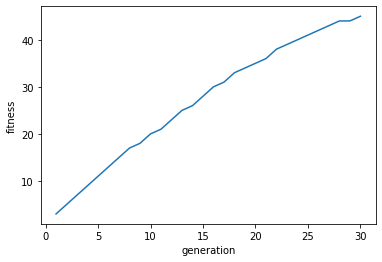

In [6]:
parent=[]
goal=["k","e"," ","e","s","h","q"," ","a","s","a","n"," ","n","e","m","u","d"," ","a","v","a","l"," ","v","a","l","i"," ","o","f","t","a","d"," ","m","o","s","h","k","e","l"," ","h","a"]
alphabet=["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"," "]

for i in range(len(goal)):
    parent.append(alphabet[random.randrange(0,len(alphabet),1)])
    
curr_fit=fitness(parent,goal)
children=200
rate=0.9
count=0
data=[]
data_x=[]
best_child=[]
while parent!=goal:
    best_child=parent
    for i in range(children):
        new_child=miutation(parent,alphabet,rate)
        phenotype(new_child,goal,1)
        if curr_fit<fitness(new_child,goal):
            curr_fit=fitness(new_child,goal)
            best_child=new_child
    parent=best_child
    count+=1
    print("--------------------------------------------------------Generation"+str(count)+"----------------------------------------------------")
    data_x.append(count)
    data.append(curr_fit)
    print("fitness : "+str(curr_fit))
    print(parent)
    
    

 
plt.plot(data_x, data)

plt.xlabel('generation')
plt.ylabel('fitness')

plt.show()

### <span style="color:green">Concolusion :</span>

both approaches reach the goal genome evantually, but **the Lamark's approch converges faster**. The reason is that when a child's genome is made by mutation, it will change one more time and becomes better for the enviroment, and this time, the change is not random and it is exactly what it should be so it becomes closer to the perfect answer in more speed.
